Chapter XX

# XXXX
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的目的是通过泰勒展开的二次近似来研究函数

$$
f(x) = e^{-x^2}
$$

及其一阶导数在不同点附近的变化趋势。具体来说，代码分两个部分进行分析：首先对函数 $f(x)$ 进行二次近似，然后对其一阶导数 $\frac{df}{dx}$ 进行二次近似。二次近似即在某一中心点 $x_0$ 处用泰勒展开式的前几项来逼近函数。

1. **对 $f(x)$ 的二次近似**：
   对于给定的中心点 $x_0$，在 $f(x)$ 的泰勒展开式中，使用一阶和二阶导数的信息来构建二次多项式近似。该近似表达式为：

   $$
   f(x) \approx f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2}(x - x_0)^2
   $$

   其中 $f(x_0)$ 是 $f(x)$ 在 $x_0$ 处的值，$f'(x_0)$ 是一阶导数在该点的值，$f''(x_0)$ 是二阶导数在该点的值。通过在多个 $x_0$ 上进行该近似，生成了不同位置的局部二次近似图，从而直观展示 $f(x)$ 在不同点的变化趋势。

2. **对 $\frac{df}{dx}$ 的二次近似**：
   对 $f(x)$ 的一阶导数 $\frac{df}{dx}$，也在多个 $x_0$ 点处进行二次近似。类似地，构建了以下二次多项式：

   $$
   f'(x) \approx f'(x_0) + f''(x_0)(x - x_0) + \frac{f'''(x_0)}{2}(x - x_0)^2
   $$

   其中 $f'(x_0)$ 是 $\frac{df}{dx}$ 在 $x_0$ 处的值，$f''(x_0)$ 是二阶导数在该点的值，$f'''(x_0)$ 是三阶导数在该点的值。这样可以得到 $\frac{df}{dx}$ 的局部二次近似曲线，展示导数的变化情况。

通过对 $f(x)$ 及其一阶导数在不同位置的二次近似，代码揭示了函数的局部行为和趋势。近似曲线的绘制展示了 $f(x)$ 和 $\frac{df}{dx}$ 的不同光滑性、对称性和变化速度，有助于理解函数在不同点的局部特性。

## 导入包

In [1]:
from sympy import lambdify, diff, evalf, sin, exp  # 导入必要的符号库函数
from sympy.abc import x  # 导入符号变量x
import numpy as np
from matplotlib import pyplot as plt  # 导入Matplotlib用于绘图
from matplotlib import cm  # 导入colormap模块

## 定义函数f(x) = exp(-x^2)并计算其值

In [2]:
f_x = exp(-x**2)  # 定义函数f(x)为exp(-x^2)
f_x

exp(-x**2)

In [3]:
x_array = np.linspace(-3, 3, 100)  # 定义x的取值范围，用于绘制函数曲线
x_0_array = np.linspace(-2.5, 2.5, 21)  # 定义用于展开的中心点x_0的范围

In [4]:
f_x_fcn = lambdify(x, f_x)  # 将符号函数f(x)转换为可数值计算的函数
f_x_array = f_x_fcn(x_array)  # 计算f(x)在x_array上的值

## 绘制函数f(x)的二次近似

In [5]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(x_0_array)))  # 使用彩虹颜色映射，生成每个x_0的颜色

In [6]:
f_x_1_diff = diff(f_x, x)  # 计算f(x)的一阶导数
f_x_1_diff

-2*x*exp(-x**2)

In [7]:
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)  # 将一阶导数转化为可数值计算的函数

In [8]:
f_x_2_diff = diff(f_x, x, 2)  # 计算f(x)的二阶导数
f_x_2_diff

2*(2*x**2 - 1)*exp(-x**2)

In [9]:
f_x_2_diff_fcn = lambdify(x, f_x_2_diff)  # 将二阶导数转化为可数值计算的函数

(-0.25, 1.25)

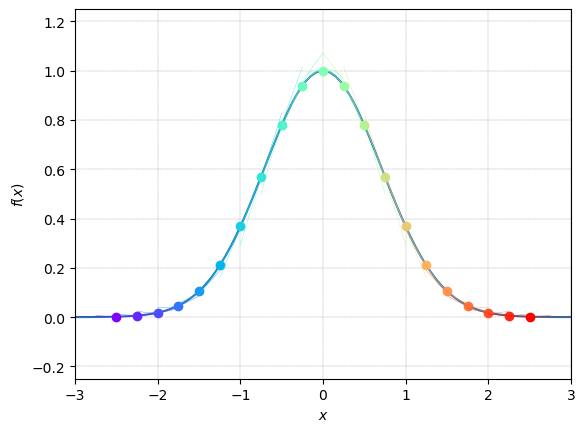

In [10]:
fig, ax = plt.subplots()  # 创建绘图窗口

ax.plot(x_array, f_x_array, linewidth=1.5)  # 绘制原函数f(x)曲线
ax.set_xlabel(r"$\it{x}$")  # 设置x轴标签
ax.set_ylabel(r"$\it{f}(\it{x})$")  # 设置y轴标签

for i in np.arange(len(x_0_array)):
    color = colors[i, :]  # 选择颜色
    x_0 = x_0_array[i]  # 获取当前的x_0值
    y_0 = f_x.evalf(subs={x: x_0})  # 计算f(x_0)
    x_t_array = np.linspace(x_0 - 0.5, x_0 + 0.5, 50)  # 定义近似区间的x取值范围

    b = f_x_1_diff.evalf(subs={x: x_0})  # 计算一阶导数在x_0的值
    a = f_x_2_diff.evalf(subs={x: x_0})  # 计算二阶导数在x_0的值

    second_order_f = a/2 * (x - x_0)**2 + b * (x - x_0) + y_0  # 构建二次近似多项式
    second_order_f_fcn = lambdify(x, second_order_f)  # 将二次近似多项式转换为数值函数
    second_order_f_array = second_order_f_fcn(x_t_array)  # 计算近似曲线在x_t_array上的值

    ax.plot(x_t_array, second_order_f_array, linewidth=0.25, color=color)  # 绘制近似曲线
    ax.plot(x_0, y_0, marker='.', color=color, markersize=12)  # 标记近似中心点

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格
ax.set_xlim((x_array.min(), x_array.max()))  # 设置x轴范围
ax.set_ylim(-0.25, 1.25)  # 设置y轴范围

## 在每个x_0点处绘制二次近似曲线

## 绘制一阶导数的二次近似

In [11]:
f_x_1_diff_new = diff(f_x, x)  # 重新计算f(x)的一阶导数
f_x_1_diff_new

-2*x*exp(-x**2)

In [12]:
f_x_1_diff_fcn_new = lambdify(x, f_x_1_diff_new)  # 转换为可数值计算的函数
f_x_1_diff_array_new = f_x_1_diff_fcn_new(x_array)  # 计算一阶导数在x_array上的值

In [13]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(x_0_array)))  # 使用彩虹色映射

In [14]:
f_x_1_diff = diff(f_x, x, 2)  # 计算二阶导数
f_x_1_diff

2*(2*x**2 - 1)*exp(-x**2)

In [15]:
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)  # 转换为可数值计算的函数

In [16]:
f_x_2_diff = diff(f_x, x, 3)  # 计算三阶导数
f_x_2_diff

4*x*(3 - 2*x**2)*exp(-x**2)

In [17]:
f_x_2_diff_fcn = lambdify(x, f_x_2_diff)  # 转换为可数值计算的函数

(-1.25, 1.25)

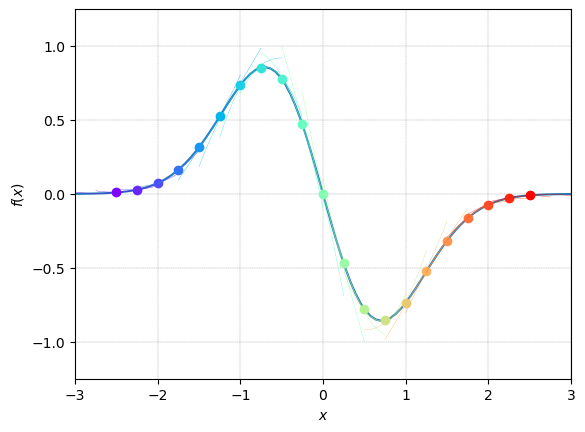

In [18]:
fig, ax = plt.subplots()  # 创建新图

ax.plot(x_array, f_x_1_diff_array_new, linewidth=1.5)  # 绘制一阶导数曲线
ax.set_xlabel(r"$\it{x}$")  # 设置x轴标签
ax.set_ylabel(r"$\it{f}(\it{x})$")  # 设置y轴标签

for i in np.arange(len(x_0_array)):
    color = colors[i, :]  # 选择颜色
    x_0 = x_0_array[i]  # 获取当前的x_0值
    y_0 = f_x_1_diff_new.evalf(subs={x: x_0})  # 计算一阶导数在x_0的值
    x_t_array = np.linspace(x_0 - 0.5, x_0 + 0.5, 50)  # 定义近似区间的x取值范围

    b = f_x_1_diff.evalf(subs={x: x_0})  # 计算二阶导数在x_0的值
    a = f_x_2_diff.evalf(subs={x: x_0})  # 计算三阶导数在x_0的值

    second_order_f = a/2 * (x - x_0)**2 + b * (x - x_0) + y_0  # 构建一阶导数的二次近似多项式
    second_order_f_fcn = lambdify(x, second_order_f)  # 转换为数值函数
    second_order_f_array = second_order_f_fcn(x_t_array)  # 计算近似曲线的值

    ax.plot(x_t_array, second_order_f_array, linewidth=0.25, color=color)  # 绘制近似曲线
    ax.plot(x_0, y_0, marker='.', color=color, markersize=12)  # 标记近似中心点

ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 添加网格
ax.set_xlim((x_array.min(), x_array.max()))  # 设置x轴范围
ax.set_ylim(-1.25, 1.25)  # 设置y轴范围